In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyextremes import EVA, get_extremes, get_return_periods

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
os.chdir('D:\\Users\\G S VASU\\Desktop\\Abhirama\\IIT Kharagpur\\4th Year\\7th Semester\\AG40215 Uncertainities Concepts in Hydrosystem Engineering\\Term Project')

In [3]:
dataframe = pd.read_csv('98_Polavaram.xlsx - Sheet1.csv')

In [4]:
dataframe = dataframe.dropna()
dataframe['Date']=dataframe['Date'].astype('datetime64[ns]')

In [5]:
#create a new dataframe with only 'Date' and 'River_Flow' columns
daily_data = dataframe[['Date', 'River_Flow']]

In [6]:
data = pd.Series(daily_data['River_Flow'])

In [8]:
# Initialize the EVA model with the data
daily_data = dataframe[['Date', 'River_Flow']]
daily_data = daily_data.set_index('Date')
data = pd.Series(daily_data['River_Flow'])
model = EVA(data=data)

In [9]:
# Extract extreme values using the Block Maxima (BM) method
model.get_extremes(
    method="BM",
    block_size="365.2425D",  # One year blocks
)

# Fit a GEV distribution to the extreme values
model.fit_model()

# Print the model parameters
print(model.model)

                   MLE model                   
-----------------------------------------------
free parameters: loc=25589.632, scale=10273.651
fixed parameters: all parameters are free      
AIC: 1147.540                                  
loglikelihood: -571.650                        
return value cache size: 0                     
fit parameter cache size: 0                    
-----------------------------------------------


In [12]:
# Estimate the 100-year return level
return_period = 100  # years
return_level = model.get_return_value(return_period,alpha=0.95)
print(f"The {return_period}-year return level is {return_level[0]} with the 95% confidence interval: [{return_level[1]}, {return_level[2]}]")

The 100-year return level is 72849.95789780281 with the 95% confidence interval: [64398.92240662832, 80472.42385681237]


In [11]:
#get the return values for the avove above model for the return periods of 2, 5, 10, 20, 50, 100, 200, 500, 1000 years
return_periods = [2, 5, 10, 20, 50, 100, 200, 500, 1000]

summary = model.get_return_value(return_period=[2, 5, 10, 20, 50, 100, 200, 500, 1000],alpha=0.95,n_samples=1000)
summary

(array([29355.05778819, 40999.49142856, 48709.11971409, 56104.38026255,
        65676.78647947, 72849.9578978 , 79996.95561856, 89426.06200509,
        96552.35719678]),
 array([26106.41633148, 36631.67732887, 43481.13356349, 49860.57388272,
        58187.21083617, 64290.70816456, 70366.30118258, 78341.84738724,
        84268.79656599]),
 array([ 32671.7551543 ,  44918.44389703,  53521.56781403,  61909.24919937,
         72813.45855485,  80963.28752687,  89192.17194171,  99977.85740238,
        108128.87223806]))

(<Figure size 960x960 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='River_Flow'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='River_Flow', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

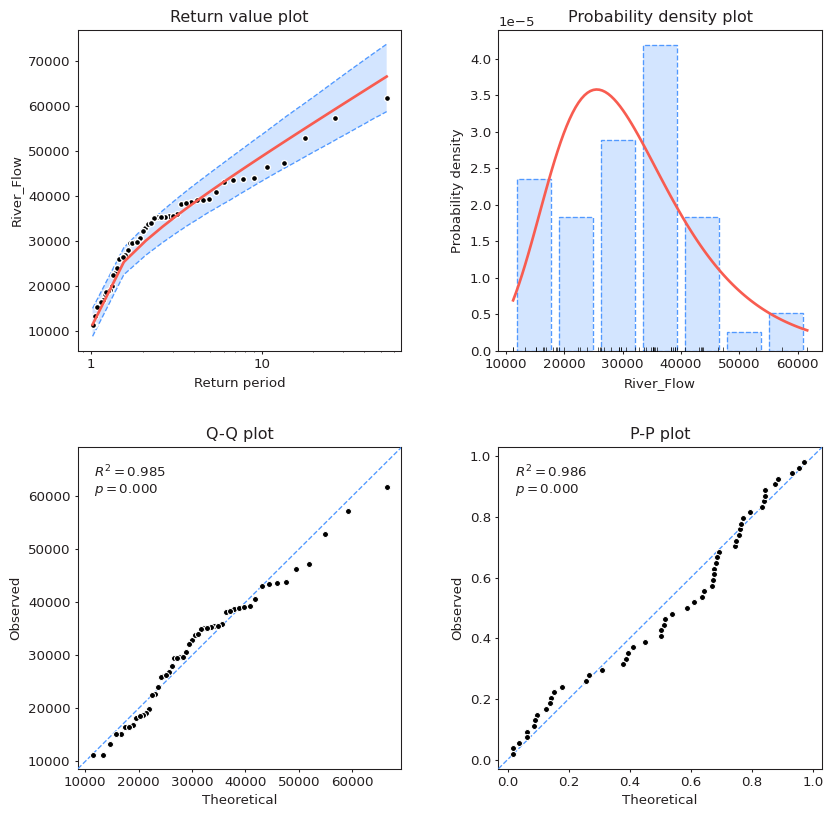

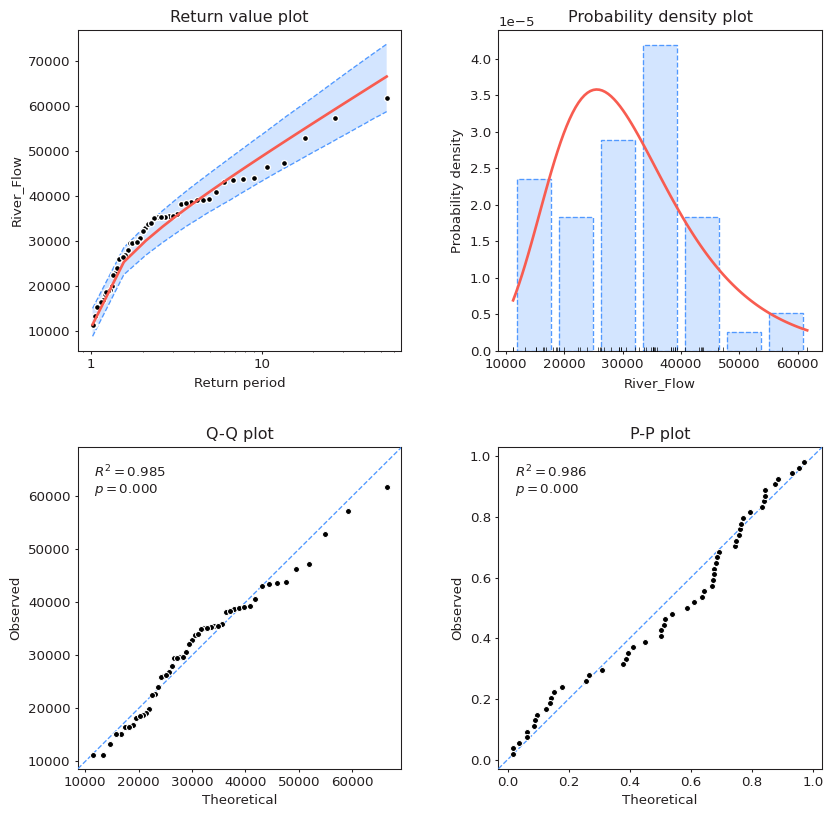

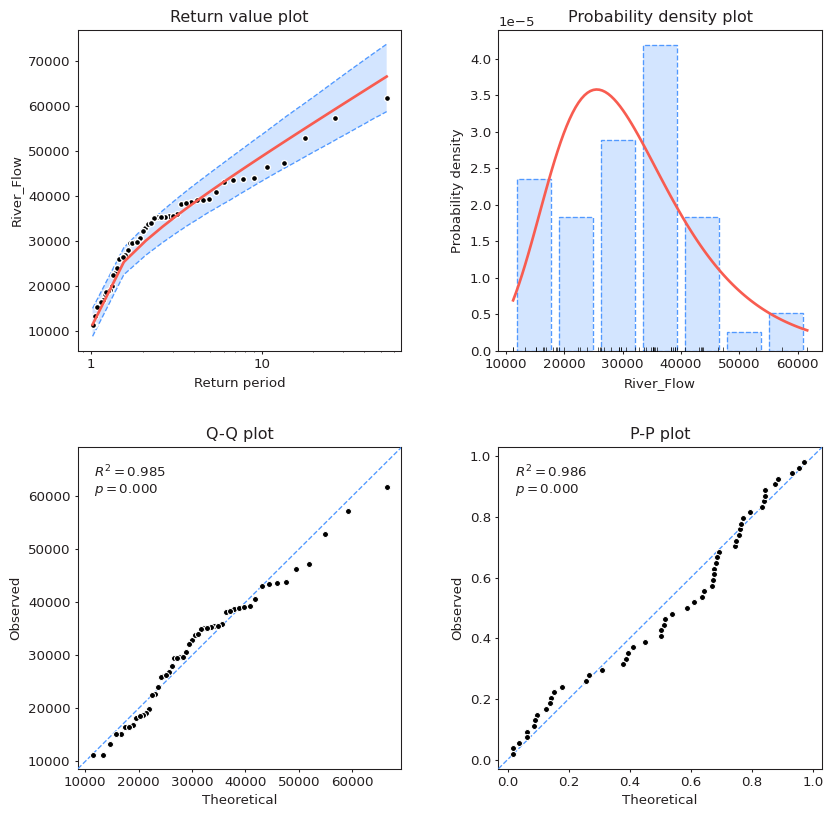

In [14]:
# Plot the model diagnostics
%matplotlib inline
model.plot_diagnostic(alpha=0.95,figsize=(10,10),n_samples=2000)

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='Return period', ylabel='River_Flow'>)

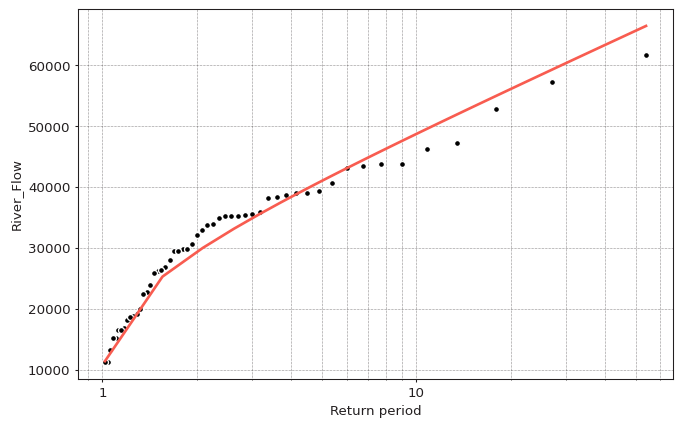

In [15]:
model.plot_return_values()